# Difference method for the oscillation equation

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from celluloid import Camera
import matplotlib.animation

plt.rcParams["animation.html"] = "jshtml"
from matplotlib.animation import FuncAnimation

%matplotlib inline

sns.set(style="darkgrid")

In [2]:
M = 100
N = 100

L = 10
T = 10

delta_x = M / L
delta_t = N / T

In [3]:
f = lambda x, t :  (6 * t * x) + (6 * x * t**4) - (12 * x**2 * t**3)
u = lambda x : x
u0 = lambda x : 1
m1 = lambda x : x - x**3 - 1
m2 = lambda x : (x**3 * L) + (L**4 * x**3) + (L) + (x) + (x**3) + (4 * L**3 * x) + (1)

...
b1 = lambda x : 1
b2 = lambda x : 1

In [68]:
web = np.zeros((N + 1, M + 1))

x = np.linspace(0, L, num = N + 1)
t = np.linspace(0, T, num = M + 1)

for i in range(0, M + 1):
    web[0, i] = u(x[i])

# web[1, 0] = delta_t**2 * ((web[0, 1] - web[0, 0]) / delta_x - b1(x[0])*web[0, 0]+ f(t[0], x[0]) + m1(t[0]) / (0.5 * delta_x)) - web[0, 0] + 2*web[0, 0]
# web[1, N] = delta_t**2 * (-(web[0, N] - web[0, N - 1] + delta_x*b2(x[0])*web[0, N]) / (0.5 * delta_x**2) + f(t[0], x[N]) + (m2(t[0]) / (0.5 * delta_x))) - web[0, N] + 2*web[0,N]
for i in range(1, M):
    web[1, i] = delta_t * u0(x[i]) + delta_t**2 / 2 * ((web[0, i-1] - 2*web[0, i] + web[0, i+1]) / delta_x**2 + f(x[i], 0)) + web[0, i]
    
for j in range(1, M):
    web[j+1, 0] = delta_t**2 * ((web[j, 1] - web[j, 0]) / delta_x - b1(x[j])*web[j, 0]+ f(t[j], x[0]) + m1(t[j]) / (0.5 * delta_x)) - web[j-1, 0] + 2*web[j, 0]
    web[j+1, N] = delta_t**2 * (-(web[j, N] - web[j, N - 1] + delta_x*b2(x[j])*web[j, N]) / (0.5 * delta_x**2) + f(t[j], x[N]) + (m2(t[j]) / (0.5 * delta_x))) - web[j-1, N] + 2*web[j,N]
    for i in range(1, N):    
        web[j+1, i] = delta_t**2 * ((web[j, i-1] - 2*web[j, i] + web[j, i+1]) / delta_x**2 + f(t[j], x[i])) - web[j-1, i] + web[0, i]  

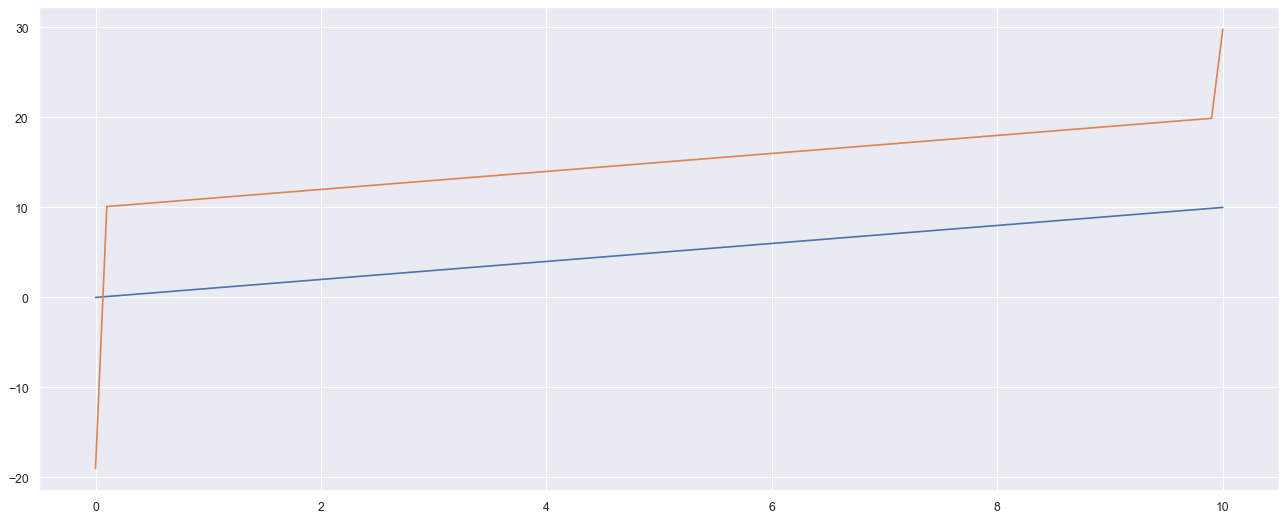

In [69]:
camera = Camera(plt.figure(figsize = (20,8), dpi = 80))

for i in range(2):
    plt.plot(x,web[i])
    camera.snap()